In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [ ]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 12s 4ms/step - loss: 1.3745 - accuracy: 0.5042 - val_loss: 0.3187 - val_accuracy: 0.9105
Epoch 2/40
907/907 [==============================] - 3s 4ms/step - loss: 0.3394 - accuracy: 0.8944 - val_loss: 0.2155 - val_accuracy: 0.9405
Epoch 3/40
907/907 [==============================] - 3s 4ms/step - loss: 0.2640 - accuracy: 0.9165 - val_loss: 0.1654 - val_accuracy: 0.9570
Epoch 4/40
907/907 [==============================] - 3s 4ms/step - loss: 0.2233 - accuracy: 0.9300 - val_loss: 0.1371 - val_accuracy: 0.9615
Epoch 5/40
907/907 [==============================] - 3s 4ms/step - loss: 0.1924 - accuracy: 0.9394 - val_loss: 0.1148 - val_accuracy: 0.9700
Epoch 6/40
907/907 [==============================] - 3s 4ms/step - loss: 0.1719 - accuracy: 0.9450 - val_loss: 0.1315 - val_accuracy: 0.9610
Epoch 7/40
907/907 [==============================] - 3s 4ms/step - loss: 0.1591 - accuracy: 0.9494 - val_loss: 0.1021 - val_accuracy: 0.9660
Epoch

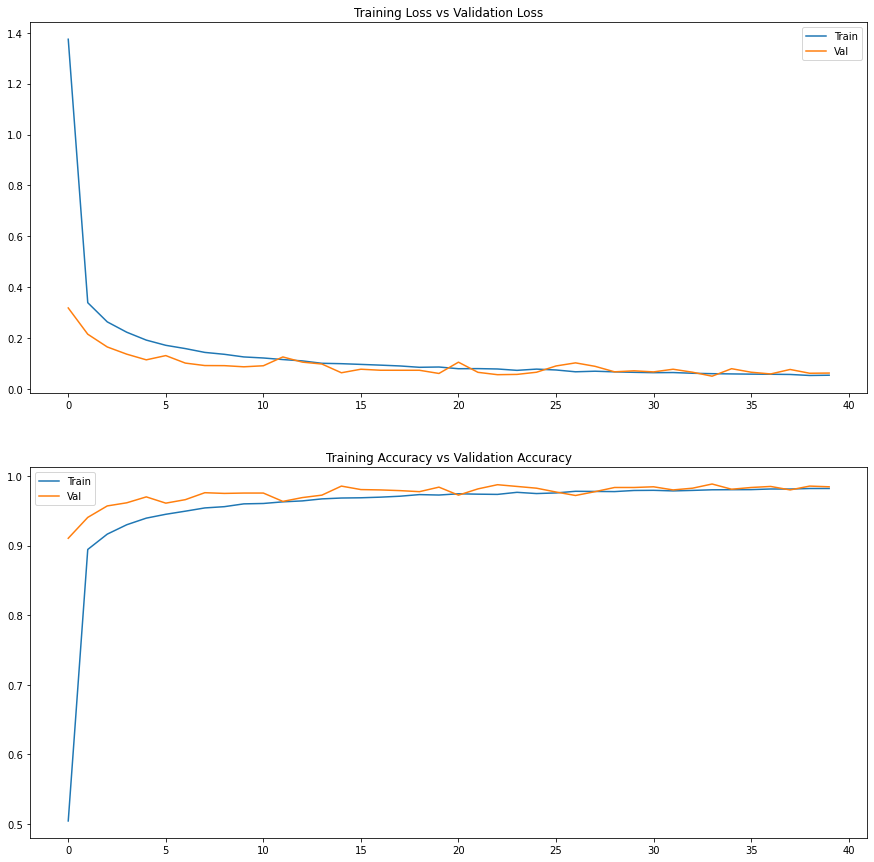

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9808


[0.06093062087893486, 0.9807999730110168]